# Проект Промышленность

## Оглавление

1. [Оглавление](#1.-Оглавление)
2. [Описание задачи](#2.-Описание_задачи)  
   2.1. [Цель проекта](#2.1-Цель_проекта)
3. [Проект](#3.-Проект)  
   3.1.[Изучение исходных данных](#3.1.-Изучение_исходных_данных)  
      3.1.1.[Вывод](#3.1.1.-Вывод)  
   3.2.[Предобработка данных](#3.2.-Предобработка_данных)  
      3.2.1.[Обработка датафрейма data_arc_new](#3.2.1.-Обработка_датафрейма_data_arc_new)  
      3.2.2.[Обработка датафрейма data_temp_new](#3.2.2.-Обработка_датафрейма_data_temp_new)  
      3.2.3.[Обработка датафрейма data_wire_new](#3.2.3.-Обработка_датафрейма_data_wire_new)  
      3.2.4.[Обработка датафрейма data_bulk_new](#3.2.4.-Обработка_датафрейма_data_bulk_new)  
      3.2.5.[Обработка датафрейма data_gas_new](#3.2.5.-Обработка_датафрейма_data_gas_new)  
   3.3.[Объединение таблиц](#3.3.-Объединение_таблиц)  
      3.3.1.[Матрица корреляций](#3.3.1.-Матрица_корреляций)  
      3.3.2.[Вывод](#3.3.2.-Вывод)  
   3.4.[Обучение моделей](#3.4.-Обучение_моделей)       
      3.4.1.[Подготовка данных](#3.4.1.-Подготовка_данных)   
      3.4.2.[Обучение моделей и подбор гиперпараметров](#3.4.2.-Обучение_моделей_и_подбор_гиперпараметров)  
   3.5. [Проверка модели на тестовых данных](#3.5.-Проверка_модели_на_тестовых_данных)    
4. [Вывод](#4.-Вывод) 

## Описание задачи

Металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали для оптимизации производственных расходов. Для этого комбинату нужно контролировать температуру сплава.  
Заказчик хочет использовать разработанную модель для имитации технологического процесса. 

Описание этапа обработки  
  
Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 
Из сплава выводится сера (этот процесс — десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).
Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.
Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).  

Описание данных  
  
Данные состоят из нескольких файлов, полученных из разных источников:  
- data_arc_new.csv — данные об электродах;  
- data_bulk_new.csv — данные о подаче сыпучих материалов (объём);  
- data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);  
- data_gas_new.csv — данные о продувке сплава газом;  
- data_temp_new.csv — результаты измерения температуры;  
- data_wire_new.csv — данные о проволочных материалах (объём);  
- data_wire_time_new.csv — данные о проволочных материалах (время).  
  
Файл data_arc_new.csv  
- key — номер партии;  
- Начало нагрева дугой — время начала нагрева;  
- Конец нагрева дугой — время окончания нагрева;  
- Активная мощность — значение активной мощности;  
- Реактивная мощность — значение реактивной мощности.  
  
Файл data_bulk_new.csv  
- key — номер партии;
- Bulk 1 … Bulk 15 — объём подаваемого материала.  
  
Файл data_bulk_time_new.csv  
- key — номер партии;
- Bulk 1 … Bulk 15 — время подачи материала.  
  
Файл data_gas_new.csv  
- key — номер партии;
- Газ 1 — объём подаваемого газа.  
  
Файл data_temp_new.csv  
- key — номер партии;
- Время замера — время замера;
- Температура — значение температуры.  
  
Файл data_wire_new.csv  
- key — номер партии;
- Wire 1 … Wire 15 — объём подаваемых проволочных материалов.  
  
Файл data_wire_time_new.csv  
- key — номер партии;
- Wire 1 … Wire 15 — время подачи проволочных материалов.
Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.


Дополнительные вводные данные от Заказчика:  
- random_state принять равным 80424. 
- пропуски в таблице заполнять нулями.
- значение точности определять метрикой MAE, которая должна быть не ниже 6,8  
- рассчитать метрику R2 для финальной модели.
- температура не может быть ниже 1500 градусов. Это связано с технологией процесса.

### Цель проекта.

Разработка модели предсказания температуры при обработке стали на финальной итерации, удовлетворяющая условиям Заказчика.

## Проект

Зададим известные константы.

In [1]:
RANDOM_STATE = 80424

Загрузим необходимы для работы библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Расширим Notebook для более удобной работы.

In [3]:
display(HTML("<style>.container { width:90% !important; }</style>"))

### Изучение исходных данных

Загрузим исходные данные в переменные.

In [4]:
data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv', index_col='key')
data_wire_new = pd.read_csv('/datasets/data_wire_new.csv', index_col='key')
data_temp_new = pd.read_csv('/datasets/data_temp_new.csv', index_col='key')
data_gas_new = pd.read_csv('/datasets/data_gas_new.csv', index_col='key')
data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv', index_col='key')
data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv', index_col='key')
data_arc_new = pd.read_csv('/datasets/data_arc_new.csv', index_col='key')

Создадим метод для вывода основной информации по датафреймам.

In [5]:
def df_information(input_df):
    print('-----------------------------------------------------------------')
    print('Общая информация:')
    input_df.info()
    #выведем инфо
    
    print('-----------------------------------------------------------------')
    print('Дубликатов -', input_df.duplicated().sum())
    #посчитаем количество дубликатов
    
    print('-----------------------------------------------------------------')
    
    print('Пропусков:')
    display(input_df.isna().sum())
    #посчитаем количество пропусков
    
    print('-----------------------------------------------------------------')
    print('Описание:')
    display(input_df.describe())
    #посмотрим на датафрейм методом discribe
    
    print('-----------------------------------------------------------------')
    print('Первые 5 строк:')
    display(input_df.head())
    #выведем первые 5 строчек датафрема
    
    print('-----------------------------------------------------------------')
    print('Последние 5 строк:')
    display(input_df.tail())
    #выведем последние 5 строчек датафрема

Загрузим данные о датафрейме ```data_wire_time_new```.

In [6]:
df_information(data_wire_time_new)

-----------------------------------------------------------------
Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 1 to 3241
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Wire 1  3055 non-null   object
 1   Wire 2  1079 non-null   object
 2   Wire 3  63 non-null     object
 3   Wire 4  14 non-null     object
 4   Wire 5  1 non-null      object
 5   Wire 6  73 non-null     object
 6   Wire 7  11 non-null     object
 7   Wire 8  19 non-null     object
 8   Wire 9  29 non-null     object
dtypes: object(9)
memory usage: 240.7+ KB
-----------------------------------------------------------------
Дубликатов - 0
-----------------------------------------------------------------
Пропусков:


Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

-----------------------------------------------------------------
Описание:


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3055,1079,63,14,1,73,11,19,29
unique,3055,1079,63,14,1,73,11,19,29
top,2019-05-03 15:45:44,2019-08-24 19:50:49,2019-07-10 20:08:55,2019-05-07 23:21:42,2019-08-13 06:14:30,2019-07-27 22:52:21,2019-08-12 21:48:11,2019-05-14 14:05:13,2019-08-09 09:11:30
freq,1,1,1,1,1,1,1,1,1


-----------------------------------------------------------------
Первые 5 строк:


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----------------------------------------------------------------
Последние 5 строк:


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
3237,2019-09-06 11:33:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3238,2019-09-06 12:18:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3239,2019-09-06 14:36:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3240,2019-09-06 15:33:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241,2019-09-06 17:10:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В датафрейме нет дубликатов и много пропусков. Еще можно обратить внимание, что самыми информативными являются столбцы `Wire 1` и `Wire 2`. В остальных столбцах мало данных. Данный датафрейм содержит информацию о дате и времени добавления проволочного материала. Для модели эти признаки будут исключены, но можно это будет использовать для определения как идет процесс.

Загрузим данные о датафрейме ```data_wire_new```.

In [7]:
df_information(data_wire_new)

-----------------------------------------------------------------
Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 1 to 3241
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wire 1  3055 non-null   float64
 1   Wire 2  1079 non-null   float64
 2   Wire 3  63 non-null     float64
 3   Wire 4  14 non-null     float64
 4   Wire 5  1 non-null      float64
 5   Wire 6  73 non-null     float64
 6   Wire 7  11 non-null     float64
 7   Wire 8  19 non-null     float64
 8   Wire 9  29 non-null     float64
dtypes: float64(9)
memory usage: 240.7 KB
-----------------------------------------------------------------
Дубликатов - 403
-----------------------------------------------------------------
Пропусков:


Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

-----------------------------------------------------------------
Описание:


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


-----------------------------------------------------------------
Первые 5 строк:


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----------------------------------------------------------------
Последние 5 строк:


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241,63.117595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данный датафрейм по всей видимости является аналогом датафрейма ```data_wire_time_new```, но с информацией о количестве подаваемого материала. Данный датафрейм имеет важную информацию и мы будем ее использовать. Можно обратить внимание, что основные данные содержат столбцы `Wire 1` и `Wire 2`, в других столбцах данных слишком мало и их можно будет исключить.

Загрузим данные о датафрейме ```data_temp_new```.

In [8]:
df_information(data_temp_new)

-----------------------------------------------------------------
Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18092 entries, 1 to 3241
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Время замера  18092 non-null  object 
 1   Температура   14665 non-null  float64
dtypes: float64(1), object(1)
memory usage: 424.0+ KB
-----------------------------------------------------------------
Дубликатов - 0
-----------------------------------------------------------------
Пропусков:


Время замера       0
Температура     3427
dtype: int64

-----------------------------------------------------------------
Описание:


,Температура
count,14665.000000
mean,1590.722741
std,20.394381
min,1191.000000
25%,1580.000000
50%,1590.000000
75%,1599.000000
max,1705.000000


-----------------------------------------------------------------
Первые 5 строк:


,Время замера,Температура
key,,
1,2019-05-03 11:02:04,1571.0
1,2019-05-03 11:07:18,1604.0
1,2019-05-03 11:11:34,1618.0
1,2019-05-03 11:18:04,1601.0
1,2019-05-03 11:25:59,1606.0


-----------------------------------------------------------------
Последние 5 строк:


,Время замера,Температура
key,,
3241,2019-09-06 16:55:01,NaN
3241,2019-09-06 17:06:38,NaN
3241,2019-09-06 17:21:48,NaN
3241,2019-09-06 17:24:44,NaN
3241,2019-09-06 17:30:05,NaN


Данный датафрейм содерджит в себе целевой признак, который надо вычленить. Для целевого признака нам потребуется температура на последней итерации процесса. В датафрейме содержится много пропусков, дубликатов нет. Так же обратим внимание, что минимальное значение температуры ниже указанного Заказчиком 1500 градусов. Эти данные надо бдет исключить. Так же в последних строках есть пропуски, возможно после более чательного анализа надо будет удалить еще часть малоинформативных данных.

Загрузим данные о датафрейме ```data_gas_new```.

In [9]:
df_information(data_gas_new)

-----------------------------------------------------------------
Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Газ 1   3239 non-null   float64
dtypes: float64(1)
memory usage: 50.6 KB
-----------------------------------------------------------------
Дубликатов - 0
-----------------------------------------------------------------
Пропусков:


Газ 1    0
dtype: int64

-----------------------------------------------------------------
Описание:


,Газ 1
count,3239.000000
mean,11.002062
std,6.220327
min,0.008399
25%,7.043089
50%,9.836267
75%,13.769915
max,77.995040


-----------------------------------------------------------------
Первые 5 строк:


,Газ 1
key,
1,29.749986
2,12.555561
3,28.554793
4,18.841219
5,5.413692


-----------------------------------------------------------------
Последние 5 строк:


,Газ 1
key,
3237,5.543905
3238,6.745669
3239,16.023518
3240,11.863103
3241,12.680959


В датафрейме содержаться данные о расходе газа на каждую партию. Пропусков в данных нет, дубликатов тоже. Разброс достаточно большой. Возможно, это связано с самим процессом.

Загрузим данные о датафрейме ```data_bulk_time_new```.

In [10]:
df_information(data_bulk_time_new)

-----------------------------------------------------------------
Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3241
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Bulk 1   252 non-null    object
 1   Bulk 2   22 non-null     object
 2   Bulk 3   1298 non-null   object
 3   Bulk 4   1014 non-null   object
 4   Bulk 5   77 non-null     object
 5   Bulk 6   576 non-null    object
 6   Bulk 7   25 non-null     object
 7   Bulk 8   1 non-null      object
 8   Bulk 9   19 non-null     object
 9   Bulk 10  176 non-null    object
 10  Bulk 11  177 non-null    object
 11  Bulk 12  2450 non-null   object
 12  Bulk 13  18 non-null     object
 13  Bulk 14  2806 non-null   object
 14  Bulk 15  2248 non-null   object
dtypes: object(15)
memory usage: 391.1+ KB
-----------------------------------------------------------------
Дубликатов - 0
--------------------------------------------------------

Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

-----------------------------------------------------------------
Описание:


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,252,22,1298,1014,77,576,25,1,19,176,177,2450,18,2806,2248
unique,252,22,1298,1014,77,576,25,1,19,176,177,2450,18,2806,2248
top,2019-07-04 07:49:47,2019-08-13 09:55:35,2019-05-12 03:29:39,2019-05-19 22:51:04,2019-08-12 21:20:02,2019-07-19 19:34:07,2019-08-13 07:20:46,2019-07-08 17:14:53,2019-05-14 11:57:58,2019-07-31 12:22:40,2019-08-15 03:24:52,2019-07-30 03:05:03,2019-08-29 14:49:47,2019-09-04 10:33:05,2019-08-07 01:04:12
freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


-----------------------------------------------------------------
Первые 5 строк:


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


-----------------------------------------------------------------
Последние 5 строк:


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
3237,NaN,NaN,2019-09-06 11:54:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 11:49:45,NaN,2019-09-06 11:45:22,2019-09-06 11:40:06
3238,NaN,NaN,2019-09-06 12:26:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 12:18:35,NaN,2019-09-06 12:31:49,2019-09-06 12:26:52
3239,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:06:00,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:01:44,NaN,2019-09-06 14:58:15,2019-09-06 14:48:06
3240,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:24:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:07:29,2019-09-06 16:01:34
3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 17:26:33,2019-09-06 17:23:15


Датафрейм содержит данные о подаче сыпучих материалов в процессе по времени. Есть много пропусков. Видно, что в каждой партии подаются разные виды сыпучего материала.

Загрузим данные о датафрейме ```data_bulk_new```.

In [11]:
df_information(data_bulk_new)

-----------------------------------------------------------------
Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3241
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bulk 1   252 non-null    float64
 1   Bulk 2   22 non-null     float64
 2   Bulk 3   1298 non-null   float64
 3   Bulk 4   1014 non-null   float64
 4   Bulk 5   77 non-null     float64
 5   Bulk 6   576 non-null    float64
 6   Bulk 7   25 non-null     float64
 7   Bulk 8   1 non-null      float64
 8   Bulk 9   19 non-null     float64
 9   Bulk 10  176 non-null    float64
 10  Bulk 11  177 non-null    float64
 11  Bulk 12  2450 non-null   float64
 12  Bulk 13  18 non-null     float64
 13  Bulk 14  2806 non-null   float64
 14  Bulk 15  2248 non-null   float64
dtypes: float64(15)
memory usage: 391.1 KB
-----------------------------------------------------------------
Дубликатов - 80
--------------------------------------

Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

-----------------------------------------------------------------
Описание:


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


-----------------------------------------------------------------
Первые 5 строк:


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


-----------------------------------------------------------------
Последние 5 строк:


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0
3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,52.0


Данные соответствуют датафрейму ```data_bulk_time_new``` и содержат объем подаваемых материалов. Можно обратить внимание, что в основные данные содержаться в столбцах `Bulk 14`, `Bulk 15`, `Bulk 12`. В остальных столбцах мало информации и их можно будет исключить из данных для модели.

Загрузим данные о датафрейме ```data_arc_new```.

In [12]:
df_information(data_arc_new)

-----------------------------------------------------------------
Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14876 entries, 1 to 3241
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Начало нагрева дугой  14876 non-null  object 
 1   Конец нагрева дугой   14876 non-null  object 
 2   Активная мощность     14876 non-null  float64
 3   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), object(2)
memory usage: 581.1+ KB
-----------------------------------------------------------------
Дубликатов - 0
-----------------------------------------------------------------
Пропусков:


Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

-----------------------------------------------------------------
Описание:


,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000
mean,0.662752,0.438986
std,0.258885,5.873485
min,0.223120,-715.479924
25%,0.467115,0.337175
50%,0.599587,0.441639
75%,0.830070,0.608201
max,1.463773,1.270284


-----------------------------------------------------------------
Первые 5 строк:


,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
key,,,,
1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


-----------------------------------------------------------------
Последние 5 строк:


,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
key,,,,
3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543
3241,2019-09-06 17:24:54,2019-09-06 17:26:15,0.389057,0.251347


Данный датафрейм содержит данные о каждой итерации нагрева дугой в рамках партий. Указаны активная и реактивная мощности. Пропусков и дубликатов в строках нет. Обратим внимание, что в столбце реактивной мощности есть отрицательные значения. Необходимо будет их удалить.

Создадим метод для построения гистограммы и боксплота.

In [13]:
def graphic_plot(df, title):
    sns.set(rc={'figure.figsize':(15,4)})
    #создадим вид графика
    
    for i in df[1:].columns:
        fig, ax = plt.subplots(2, 1, 
                               figsize=(15,7), 
                               sharex=True, 
                               gridspec_kw=dict(height_ratios=[10,1])
                               )
        #создадим сетку для отрисовки графиков
        
        plot_hist = sns.histplot(data=df[i], 
                                 x=df[i], 
                                 bins=200, 
                                 kde=True, 
                                 ax=ax[0],
                                 discrete=True
                                )
        #построим гистограмму
        
        plot_hist.set_title(title + ' ' +i)
        plot_hist.set_ylabel('Количество строк')
        #добавим подписи
        
        plot_box = sns.boxplot(data=df[i], 
                               x=df[i], 
                               ax=ax[1]
                              )
        #построим боксплот
        
        plot_box.set_xlabel('Материал')
        #добавим подписи

Создадим графики для датафрейма ```data_wire_new```.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


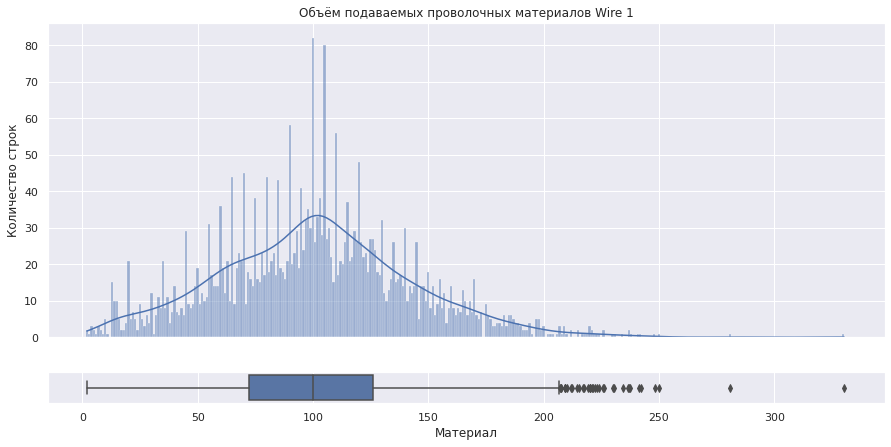

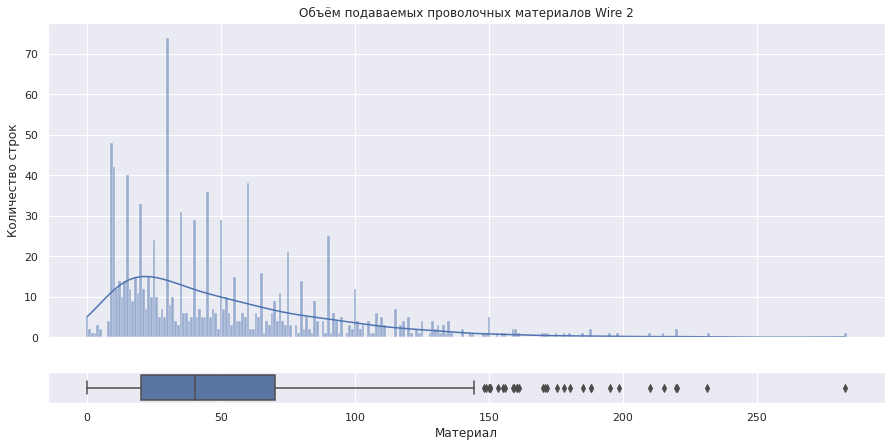

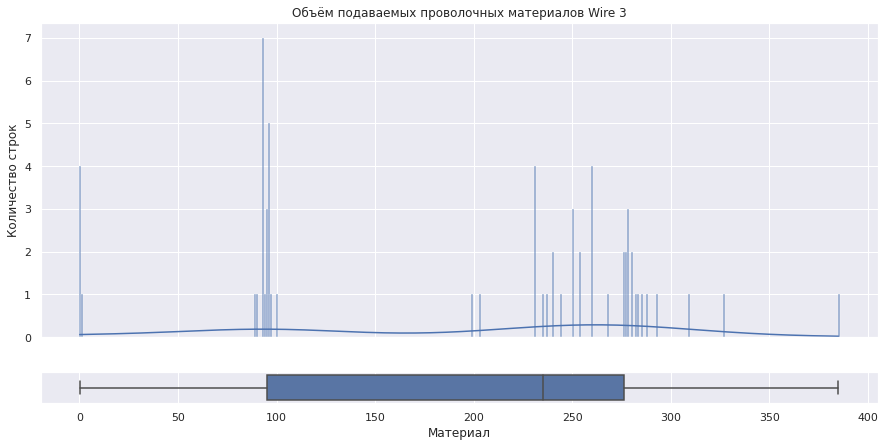

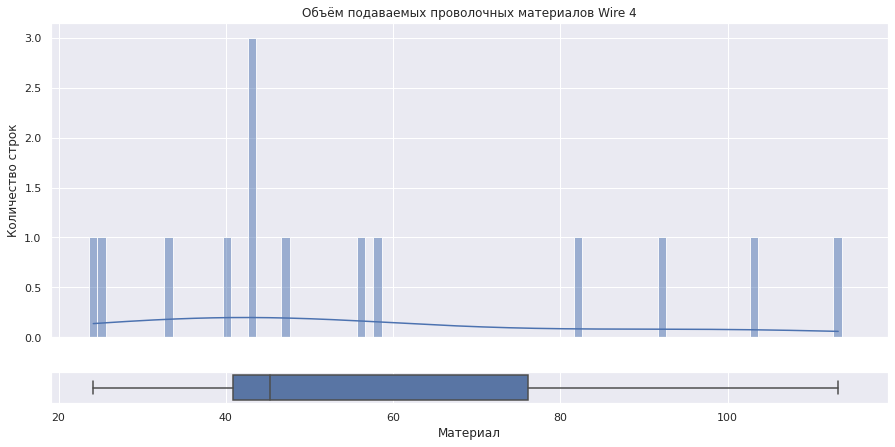

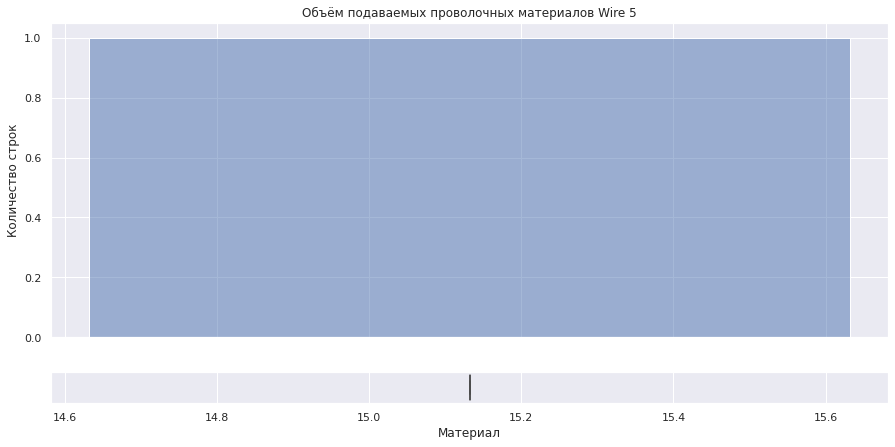

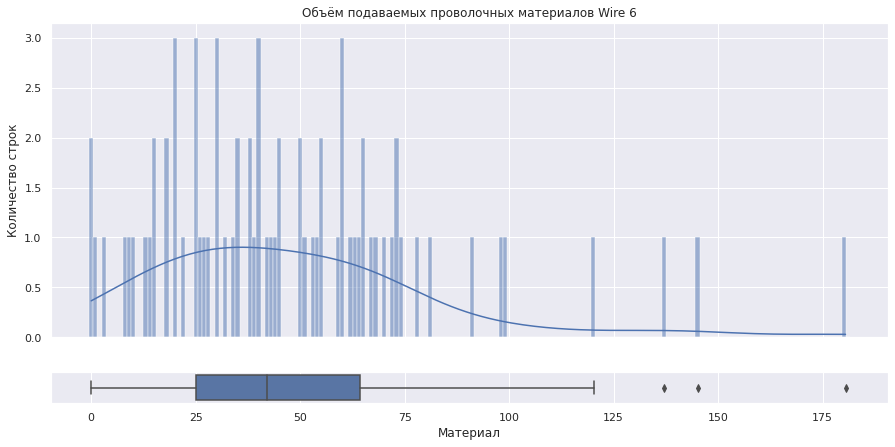

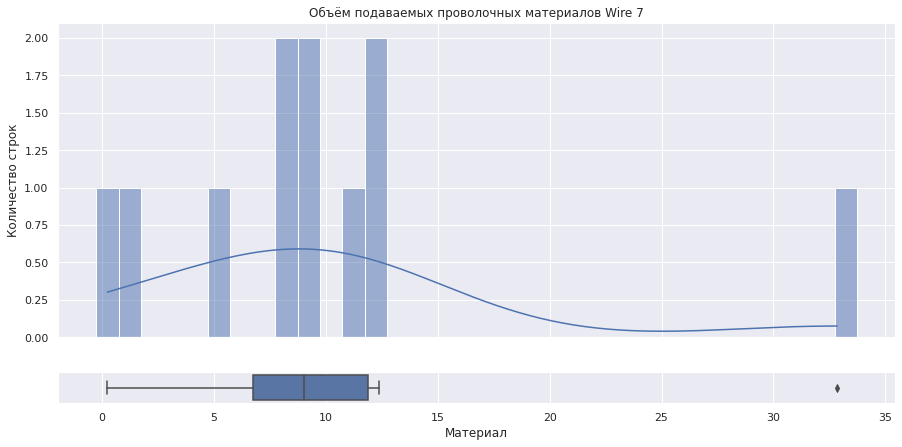

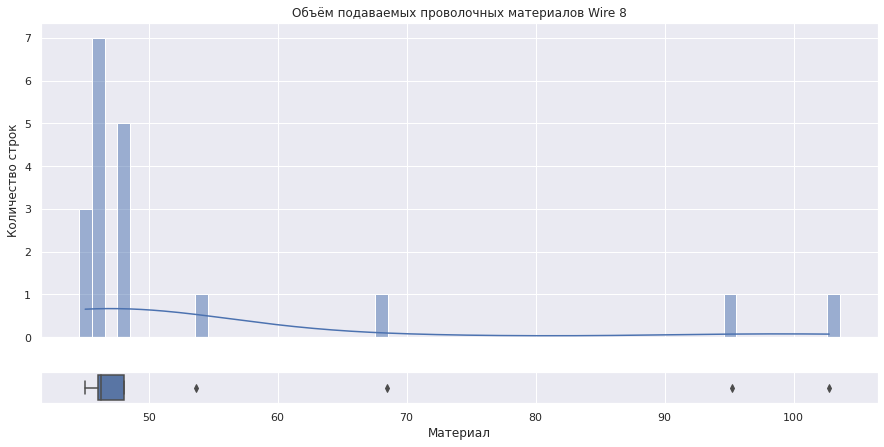

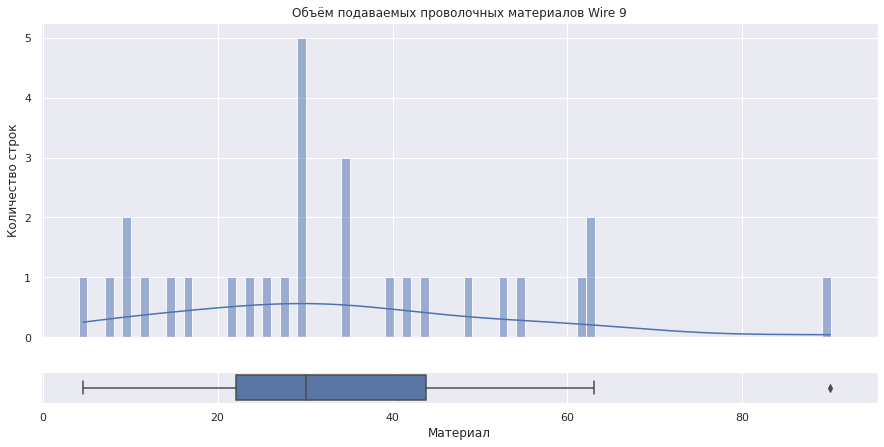

In [14]:
graphic_plot(data_wire_new, 'Объём подаваемых проволочных материалов')

Увидим, что графики информативны только для столбцов `Wire 1` и `Wire 2`. Для остальных графиков слишком мало данных. В столбцах `Wire 1` и `Wire 2` данные в основном распределны нормально, имется незначительные выбросы.

Создадим графики для датафрейма ```data_gas_new```.

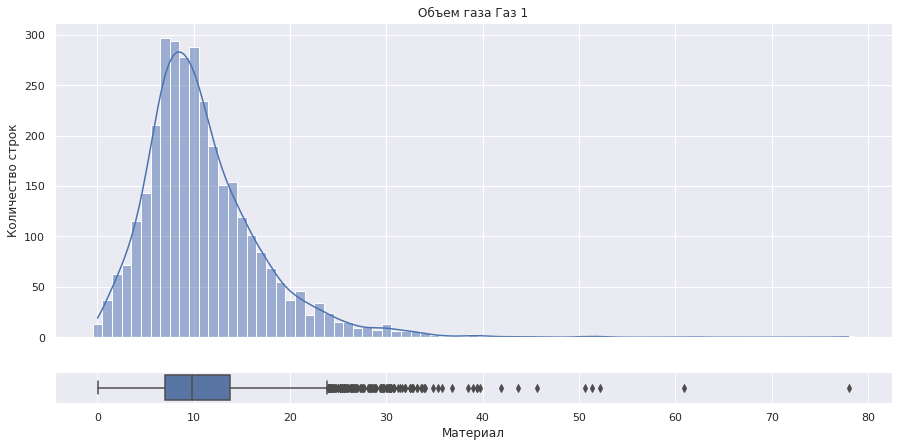

In [15]:
graphic_plot(data_gas_new, 'Объем газа')

В данных имеется большое количество выбросов, в остальном данные распредлены нормально. В данных изначально было видно, что имеется большой разброс между подаваемым газом в разных партиях. Возможно, это связано с самой технологией и для каких-то партий газ не подается, а для каких-то его нужно подавать много. Предлагаю оставить данные без изменений.

Создадим графики для датафрейма ```data_bulk_new```.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


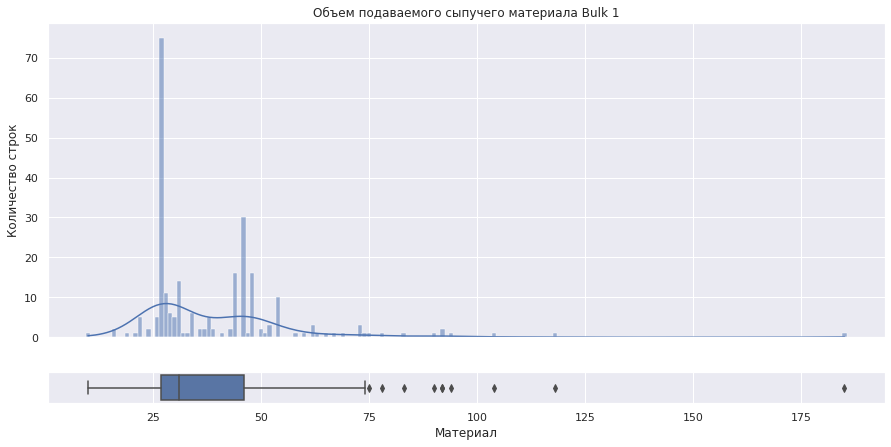

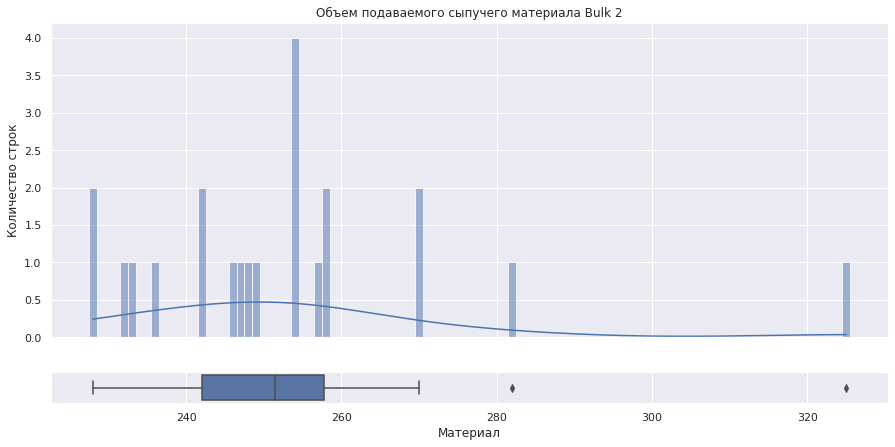

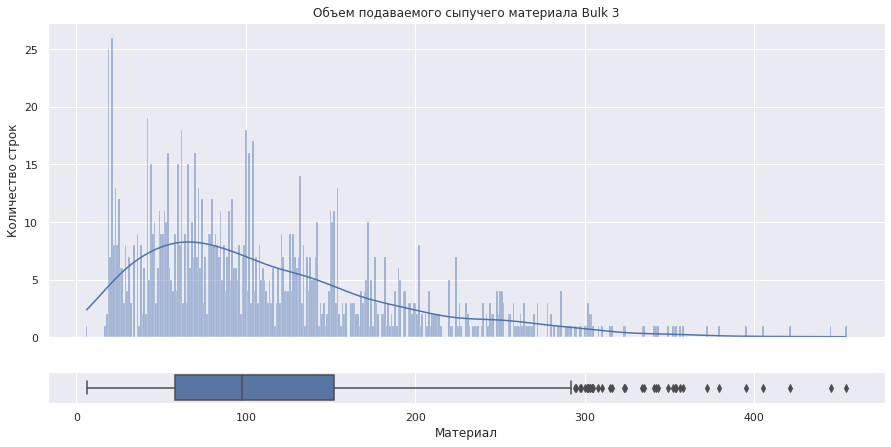

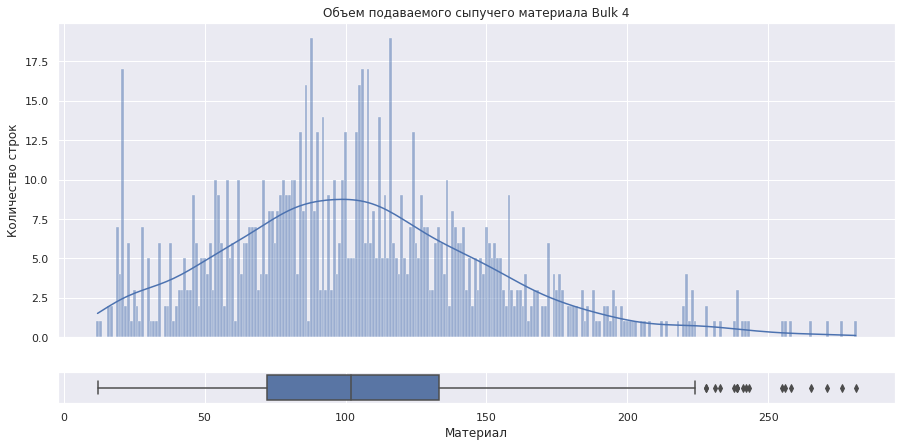

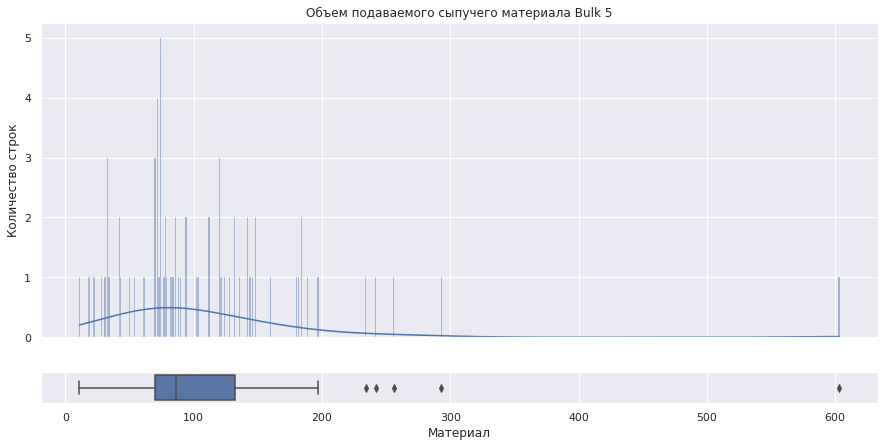

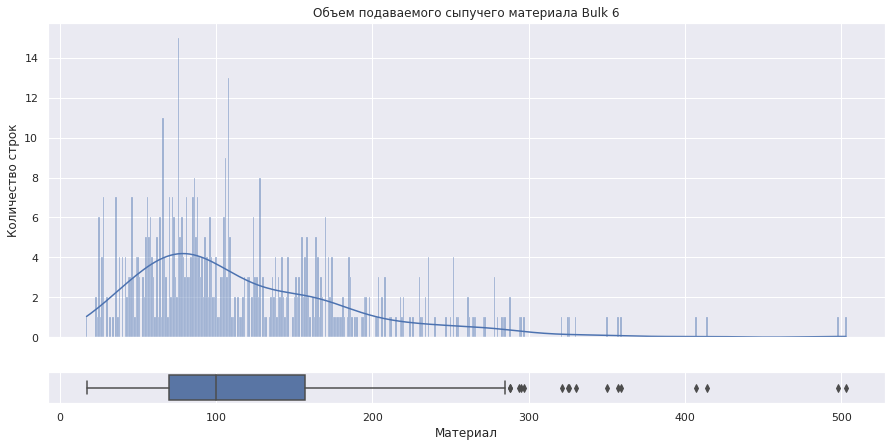

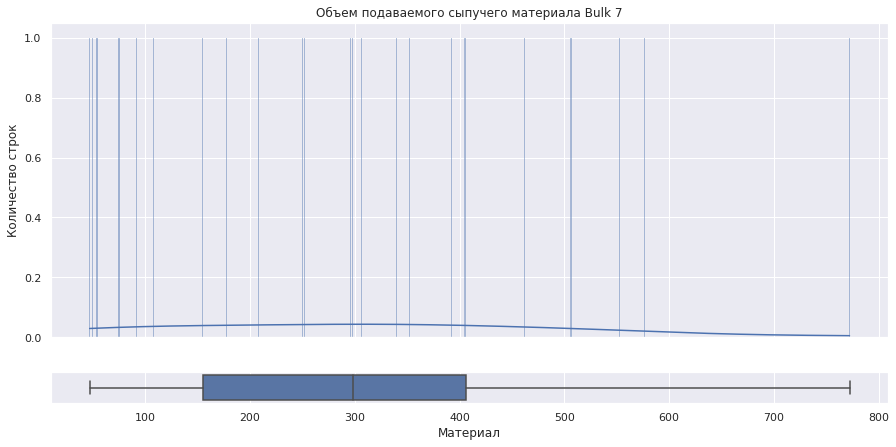

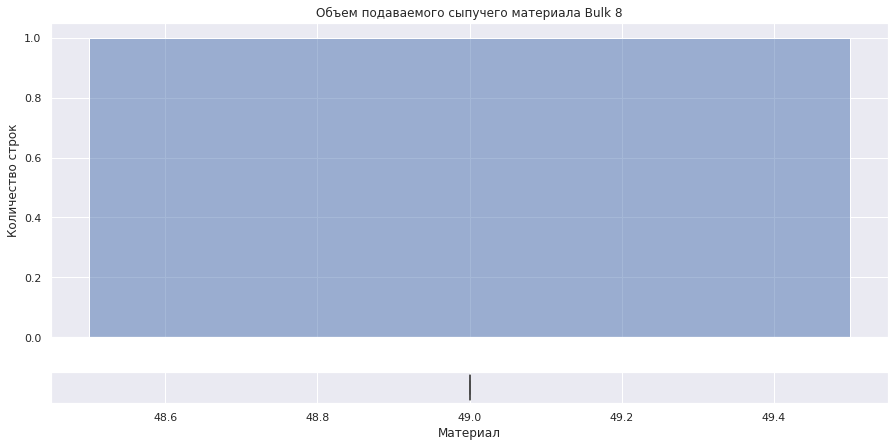

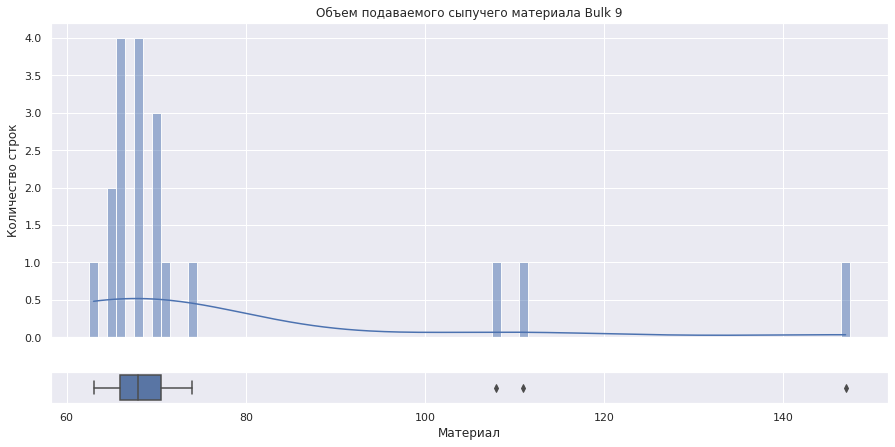

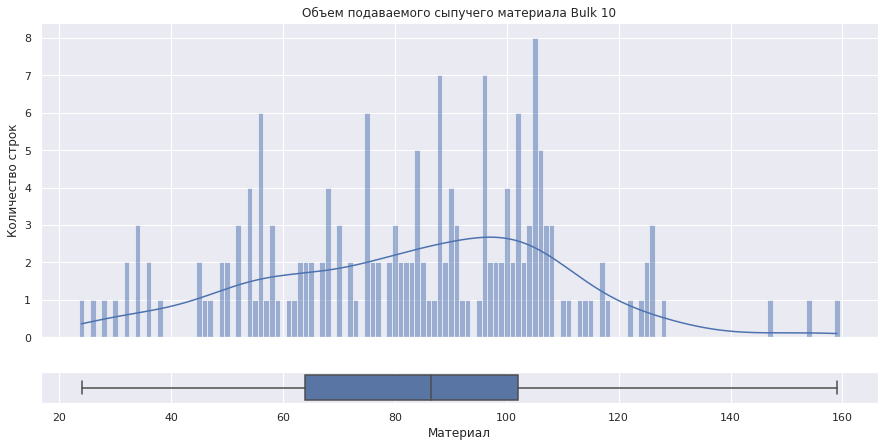

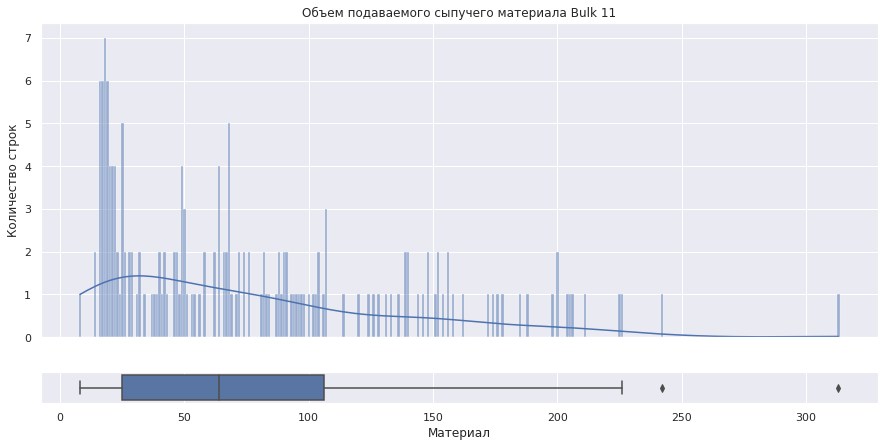

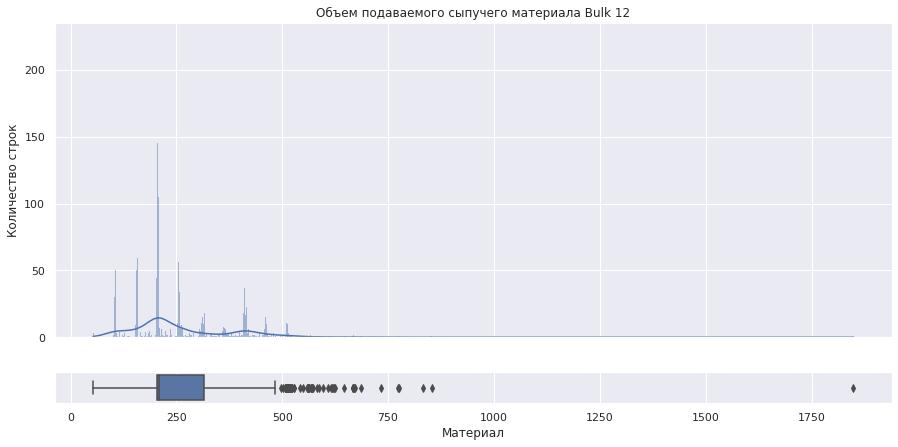

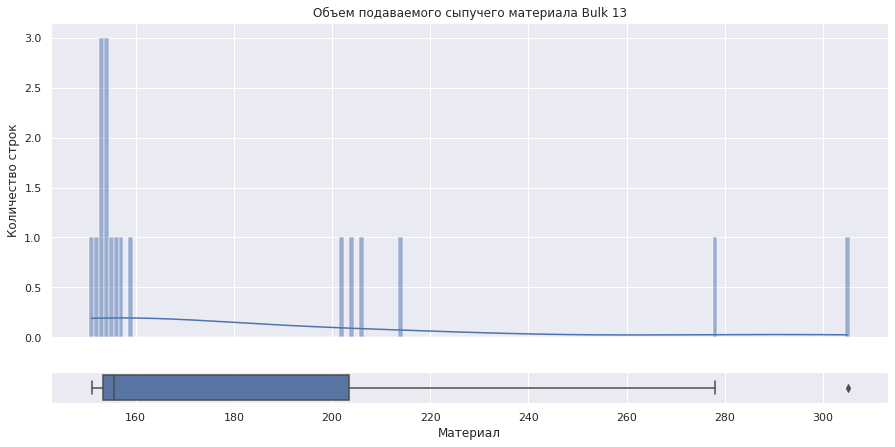

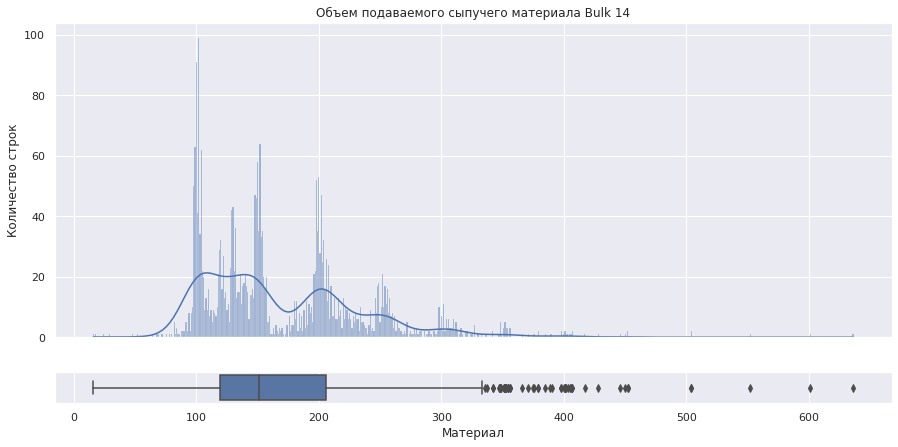

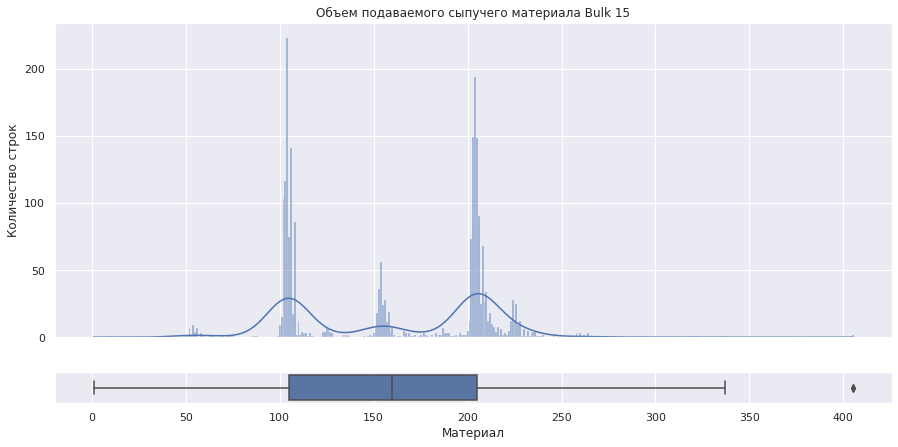

In [16]:
graphic_plot(data_bulk_new, 'Объем подаваемого сыпучего материала')

Нас интересуют графики по столбцам `Bulk 14`, `Bulk 15` и `Bulk 12`. Видно, что данные распределены неравномерно. Возможно, это опять же связано со спецификой процесса и для каких-то партий нужно подавать больше сыпучего материала, а для каких-то меньше. Предлагаю оставить без изменений.

Построим как выглядит технологический процесс для одной партии по времени. Для этого напишем функцию и посмотрим как происходит процесс на примере одной партии.

In [17]:
def process(part_number):
    
    bulk_and_t = pd.concat([data_bulk_new.iloc[part_number].dropna(), data_bulk_time_new.iloc[part_number].dropna()], axis=1)
    bulk_and_t.columns = ['meaning','time']
    #объединим датафреймы с материалом и временем подсыпки
    
    wire_and_t = pd.concat([data_wire_new.iloc[part_number].dropna(), data_wire_time_new.iloc[part_number].dropna()], axis=1)
    wire_and_t.columns = ['meaning','time']
    #объединим датафреймы с материалом и временем подсыпки
    
    temp = data_temp_new.iloc[data_temp_new.index==(part_number+1)]
    temp.columns = ['time','meaning']
    #расположим данные в датафрейме с температурой и временем замера и запишем в новую переменную
    
    wire_bulk = pd.concat([wire_and_t, bulk_and_t, temp]).sort_values(by='time')
    #объединим все получившиеся данные в одной таблице
    
    return wire_bulk

In [18]:
process(20)

,meaning,time
21,1603.000000,2019-05-04 03:29:58
Wire 2,98.367363,2019-05-04 03:32:33
21,1579.000000,2019-05-04 03:35:24
Wire 1,119.290081,2019-05-04 03:39:43
21,1581.000000,2019-05-04 03:42:16
Bulk 15,202.000000,2019-05-04 03:52:41
21,1626.000000,2019-05-04 03:55:42
Bulk 14,401.000000,2019-05-04 03:58:14
21,1617.000000,2019-05-04 04:18:16
Bulk 12,233.000000,2019-05-04 04:20:44


Из процесса видно, что замер температуры происходит перед и после каждой итерации подсыпки материалов. сначала подаются проволочные материалы, затем сыпучие.

#### Вывод

В рамках изучения исходных данных были изучены все датафреймы. Из датафреймов можно увидеть, что в них практически нет пропусков и дубликатов, только пропуски связанные с самим устройством датафреймов и видов материалов. Основные информативные столбца в датафрейме ```data_bulk_new``` это `Bulk 14`, `Bulk 15` и `Bulk 12`, остальные можно ислючить. Так же видно, что в датафрейме ```data_wire_new``` информацию несут только столбцы `Wire 1` и `Wire 2`, остальные можно исключить из-за слишком малого объема содержашейся информации. Данные, содержащиеся в датафреймах имеют выбросы по всей видимости связанные с технологией самого процесса. В датафрейме ```data_gas_new``` имеются данные об отрицательной реактивной мощности, вероятность такого слишком мала и поэтому эти данные следует исключить из датафрейма. В датафрейме ```data_temp_new``` видно, что некоторые температуры ниже 1500 градусов, что противоречит условиям самого процесса по информации от Заказчика, это ошибочные данные и их так же следует исключить. Так же можно будет добавить новые признаки для улучшения качества модели.

### Предобработка данных

#### Обработка датафрейма ```data_arc_new```

In [19]:
data_arc_new_ch = data_arc_new[data_arc_new['Реактивная мощность'] > 0]
#исключим из датафрейма данные с реактивной мощностью меньше 0

dur = []

for i in range(len(data_arc_new_ch)):
    dur.append((pd.to_datetime(data_arc_new_ch.values[i][1]) - pd.to_datetime(data_arc_new_ch.values[i][0])).total_seconds())

data_arc_new_ch['duration_arc'] = dur
#высчитаем время действия дуги и запишем как новый признак

iteration_of_heat = data_arc_new.groupby(by=data_arc_new.index).count().values[:,1]
data_arc_new_ch = data_arc_new_ch.drop(['Конец нагрева дугой', 'Начало нагрева дугой'], axis=1)
#высчитаем количество итераций нагрева дугой и запишем как новый признак

data_arc_new_ch = data_arc_new_ch.groupby(by=data_arc_new_ch.index).sum()
#сгруппируем данные по индексу (номер партии) и суммируем данные по партиям

data_arc_new_ch['iteration_of_heat'] = iteration_of_heat
#добавим данные по количеству итераций нагрева дугой в данные

data_arc_new_ch['full_power'] = (data_arc_new_ch['Активная мощность']**2 + data_arc_new_ch['Реактивная мощность']**2)**0.5
#добавим новый признак - полная мощность

data_arc_new_ch = data_arc_new_ch.rename(columns={'Активная мощность' : 'active_power', 'Реактивная мощность' : 'reactive_power'})
#переименуем столбцы

/tmp/ipykernel_166/796247178.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arc_new_ch['duration_arc'] = dur


Посмотрим, что получилось.

In [20]:
data_arc_new_ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   active_power       3214 non-null   float64
 1   reactive_power     3214 non-null   float64
 2   duration_arc       3214 non-null   float64
 3   iteration_of_heat  3214 non-null   int64  
 4   full_power         3214 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 150.7 KB


In [21]:
data_arc_new_ch.describe()

,active_power,reactive_power,duration_arc,iteration_of_heat,full_power
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,3.067329,2.254462,794.545115,4.628500,3.807709
std,1.208697,0.894743,332.491076,1.608647,1.501324
min,0.267676,0.196228,57.000000,1.000000,0.331897
25%,2.235394,1.630658,571.000000,4.000000,2.774490
50%,2.984581,2.176833,770.000000,4.000000,3.693107
75%,3.775472,2.788330,983.000000,6.000000,4.692371
max,12.375636,8.949049,4189.000000,16.000000,15.272257


In [22]:
data_arc_new_ch.head()

,active_power,reactive_power,duration_arc,iteration_of_heat,full_power
key,,,,,
1,3.036730,2.142821,1098.0,5,3.716640
2,2.139408,1.453357,811.0,4,2.586371
3,4.063641,2.937457,655.0,5,5.014163
4,2.706489,2.056992,741.0,4,3.399456
5,2.252950,1.687991,869.0,4,2.815155


Данные добавлены, пропусков нет, отрицательных значений в данных тоже нет.

#### Обработка датафрейма ```data_temp_new```

In [23]:
data_temp_new_ch = data_temp_new[data_temp_new['Температура'] >= 1500]
#исключим из итогового датафрейма температуры ниже 1500 градусов

key_1 = ((data_temp_new_ch.groupby(by=data_temp_new_ch.index).count() == 1)['Температура'])
key_1 = key_1[key_1==True].index
data_temp_new_ch = data_temp_new_ch[~data_temp_new_ch.index.isin(key_1)]
#исключим из датафрейма те партии, где был только один замер температуры

data_temp_new_fl = pd.DataFrame(index=data_temp_new_ch.index.unique(),columns=['first_measure','last_measure', 'duration_temp'])

for i in data_temp_new_ch.index.unique():
    data_temp_new_fl['first_measure'][i] = data_temp_new_ch.loc[data_temp_new_ch.index == i, 'Температура'].values[0]
    data_temp_new_fl['last_measure'][i] = data_temp_new_ch.loc[data_temp_new_ch.index == i, 'Температура'].values[-1]
    #оставим в датафрейме только информацию по температуре перед началом партии и последний замер температуры - целевой признак
    
    data_temp_new_fl['duration_temp'][i] = (pd.to_datetime(data_temp_new_ch.loc[data_temp_new_ch.index == i, 'Время замера'].values[-1]) - \
                                      pd.to_datetime(data_temp_new_ch.loc[data_temp_new_ch.index == i, 'Время замера'].values[0])).total_seconds()
#добавим новый признак - время процесса по воздействи температуры

Посмотрим, что получилось.

In [24]:
data_temp_new_fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 1 to 2499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_measure  2475 non-null   object
 1   last_measure   2475 non-null   object
 2   duration_temp  2475 non-null   object
dtypes: object(3)
memory usage: 141.9+ KB


In [25]:
data_temp_new_fl.describe()

,first_measure,last_measure,duration_temp
count,2475.0,2475.0,2475.0
unique,141.0,106.0,1704.0
top,1588.0,1593.0,1603.0
freq,56.0,134.0,6.0


In [26]:
data_temp_new_fl.head()

,first_measure,last_measure,duration_temp
key,,,
1,1571.0,1613.0,1714.0
2,1581.0,1602.0,1265.0
3,1596.0,1599.0,1753.0
4,1601.0,1625.0,1220.0
5,1576.0,1602.0,1536.0


Данные добавлены, лишние данные удалены. Так же в таблице остались только первый и последний замер температуры. Последний замер температуры - целевой признак.

#### Обработка датафрейма ```data_wire_new```

In [27]:
data_wire_new_ch = data_wire_new.drop(data_wire_new.columns[2:], axis=1)
#удалим все столбцы кроме Wire 1 и Wire 2

data_wire_new_ch = data_wire_new_ch.fillna(value = 0)
#заполним пропуски нулями

Посмотрим, что получилось.

In [28]:
data_wire_new_ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 1 to 3241
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wire 1  3081 non-null   float64
 1   Wire 2  3081 non-null   float64
dtypes: float64(2)
memory usage: 136.8 KB


In [29]:
data_wire_new_ch.describe()

,Wire 1,Wire 2
count,3081.000000,3081.000000
mean,100.044411,17.712733
std,42.841120,33.517734
min,0.000000,0.000000
25%,70.281120,0.000000
50%,100.114563,0.000000
75%,125.798405,23.162880
max,330.314424,282.780152


In [30]:
data_wire_new_ch.head()

,Wire 1,Wire 2
key,,
1,60.059998,0.00000
2,96.052315,0.00000
3,91.160157,0.00000
4,89.063515,0.00000
5,89.238236,9.11456


Лишние столбцы удален, пропуски заполнены.

#### Обработка датафрейма ```data_bulk_new```

In [31]:
data_bulk_new_ch = data_bulk_new.drop(data_bulk_new.columns[:11], axis=1)
data_bulk_new_ch = data_bulk_new_ch.drop(data_bulk_new.columns[12], axis=1)
#удалим все столбцы кроме Bulk 14, Bulk 15 и Bulk 12

data_bulk_new_ch = data_bulk_new_ch.fillna(value = 0)
#заполним пропуски нулями

Посмотрим, что получилось.

In [32]:
data_bulk_new_ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3241
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bulk 12  3129 non-null   float64
 1   Bulk 14  3129 non-null   float64
 2   Bulk 15  3129 non-null   float64
dtypes: float64(3)
memory usage: 162.3 KB


In [33]:
data_bulk_new_ch.describe()

,Bulk 12,Bulk 14,Bulk 15
count,3129.000000,3129.000000,3129.000000
mean,203.948226,152.706616,115.319271
std,151.419639,81.091421,84.488698
min,0.000000,0.000000,0.000000
25%,105.000000,104.000000,0.000000
50%,206.000000,148.000000,106.000000
75%,263.000000,202.000000,204.000000
max,1849.000000,636.000000,405.000000


In [34]:
data_bulk_new_ch.head()

,Bulk 12,Bulk 14,Bulk 15
key,,,
1,206.0,150.0,154.0
2,206.0,149.0,154.0
3,205.0,152.0,153.0
4,207.0,153.0,154.0
5,203.0,151.0,152.0


Лишние столбцы удалены, пропуски заполнены нулями.

#### Обработка датафрейма ```data_gas_new```

In [35]:
data_gas_new = data_gas_new.rename(columns={'Газ 1' : 'gas_1'})
#изменим наименование столбца

### Объединение таблиц

In [36]:
final_df = data_temp_new_fl.join(data_bulk_new_ch, how='inner')\
            .join(data_wire_new_ch, how='inner')\
            .join(data_arc_new_ch, how='inner')\
            .join(data_gas_new, how='inner')\
            .reset_index()
#объединим таблицы методом inner

Посмотрим, что получилось.

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                2329 non-null   int64  
 1   first_measure      2329 non-null   object 
 2   last_measure       2329 non-null   object 
 3   duration_temp      2329 non-null   object 
 4   Bulk 12            2329 non-null   float64
 5   Bulk 14            2329 non-null   float64
 6   Bulk 15            2329 non-null   float64
 7   Wire 1             2329 non-null   float64
 8   Wire 2             2329 non-null   float64
 9   active_power       2329 non-null   float64
 10  reactive_power     2329 non-null   float64
 11  duration_arc       2329 non-null   float64
 12  iteration_of_heat  2329 non-null   int64  
 13  full_power         2329 non-null   float64
 14  gas_1              2329 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 273.1+ KB


In [38]:
final_df.describe()

,key,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,active_power,reactive_power,duration_arc,iteration_of_heat,full_power,gas_1
count,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000
mean,1251.832546,208.415629,153.853585,119.952769,102.443601,17.609859,3.125033,2.300522,807.600687,4.695578,3.881500,11.375600
std,714.762400,157.062272,81.404354,84.640443,43.539993,33.624771,1.221007,0.903968,340.897332,1.606629,1.516643,6.392041
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.267676,0.196228,57.000000,1.000000,0.331897,0.008399
25%,630.000000,105.000000,105.000000,0.000000,73.207679,0.000000,2.293900,1.669572,581.000000,4.000000,2.841624,7.282948
50%,1255.000000,206.000000,149.000000,107.000000,101.119201,0.000000,3.035365,2.225398,778.000000,5.000000,3.767064,10.100950
75%,1868.000000,282.000000,204.000000,204.000000,128.091599,23.102560,3.834300,2.829159,993.000000,6.000000,4.767256,14.216688
max,2499.000000,1849.000000,636.000000,405.000000,330.314424,282.780152,12.375636,8.949049,4189.000000,16.000000,15.272257,77.995040


Таблицы объединены. Нужно привести типы данных к численным.

In [39]:
data_types_dict = {'Bulk 12': 'float32',
                   'Bulk 14': 'float32',
                   'Bulk 15': 'float32',
                   'Wire 1': 'float32',
                   'Wire 2': 'float32', 
                   'active_power': 'float32',
                   'reactive_power': 'float32',
                   'duration_arc': 'float32',
                   'iteration_of_heat': 'int32',
                   'full_power': 'float32',
                   'gas_1': 'float32',
                   'first_measure': 'float32',
                   'last_measure': 'float32',
                   'duration_temp': 'float32'
                    } 

final_df = final_df.astype(data_types_dict)

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                2329 non-null   int64  
 1   first_measure      2329 non-null   float32
 2   last_measure       2329 non-null   float32
 3   duration_temp      2329 non-null   float32
 4   Bulk 12            2329 non-null   float32
 5   Bulk 14            2329 non-null   float32
 6   Bulk 15            2329 non-null   float32
 7   Wire 1             2329 non-null   float32
 8   Wire 2             2329 non-null   float32
 9   active_power       2329 non-null   float32
 10  reactive_power     2329 non-null   float32
 11  duration_arc       2329 non-null   float32
 12  iteration_of_heat  2329 non-null   int32  
 13  full_power         2329 non-null   float32
 14  gas_1              2329 non-null   float32
dtypes: float32(13), int32(1), int64(1)
memory usage: 145.7 KB


Типы данных приведены.

In [41]:
final_df.tail()

,key,first_measure,last_measure,duration_temp,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,active_power,reactive_power,duration_arc,iteration_of_heat,full_power,gas_1
2324,2495,1570.0,1591.0,1380.0,256.0,129.0,223.0,89.150879,0.00000,3.168133,2.210936,723.0,4,3.863328,7.125735
2325,2496,1554.0,1591.0,1705.0,256.0,129.0,226.0,114.179527,0.00000,4.174918,2.872031,940.0,6,5.067396,9.412616
2326,2497,1571.0,1589.0,962.0,230.0,124.0,226.0,94.086723,9.04800,3.605239,2.452092,569.0,3,4.360104,6.271699
2327,2498,1591.0,1594.0,1520.0,206.0,129.0,207.0,118.110718,0.00000,3.202310,2.239820,750.0,5,3.907887,14.953657
2328,2499,1569.0,1603.0,1537.0,233.0,126.0,227.0,110.160957,50.00528,1.737084,1.296836,883.0,4,2.167774,11.336151


In [42]:
final_df = final_df.drop('key', axis=1)
#удалим ненужный признак key

In [43]:
final_df.iloc[:,0:4]

,first_measure,last_measure,duration_temp,Bulk 12
0,1571.0,1613.0,1714.0,206.0
1,1581.0,1602.0,1265.0,206.0
2,1596.0,1599.0,1753.0,205.0
3,1601.0,1625.0,1220.0,207.0
4,1576.0,1602.0,1536.0,203.0
...,...,...,...,...
2324,1570.0,1591.0,1380.0,256.0
2325,1554.0,1591.0,1705.0,256.0
2326,1571.0,1589.0,962.0,230.0
2327,1591.0,1594.0,1520.0,206.0


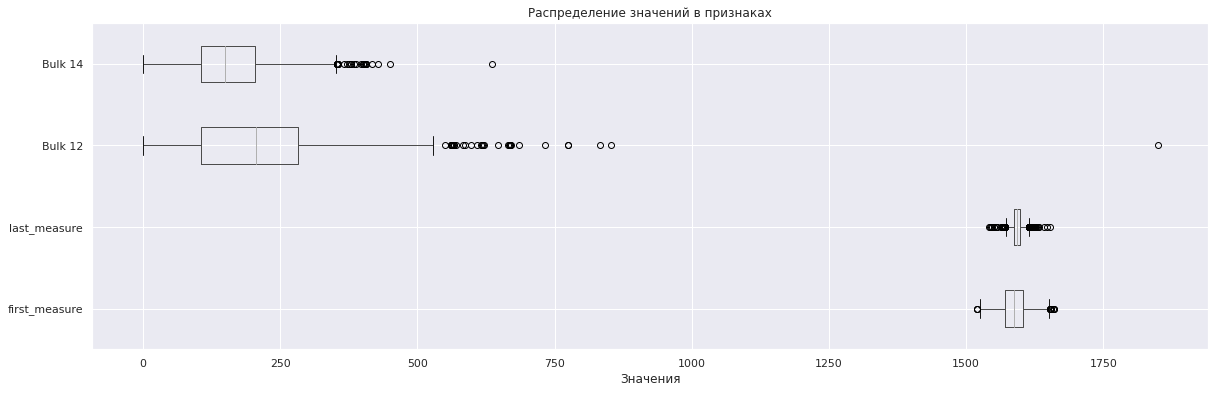

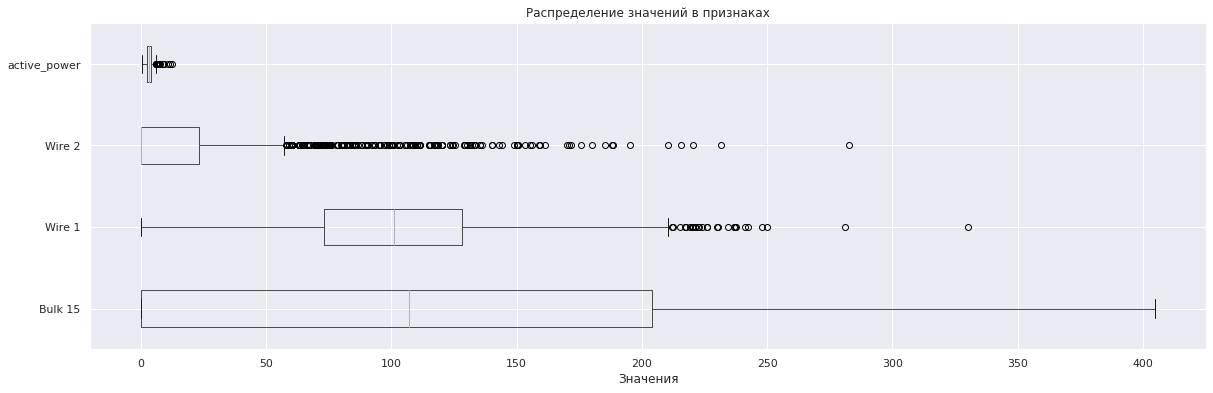

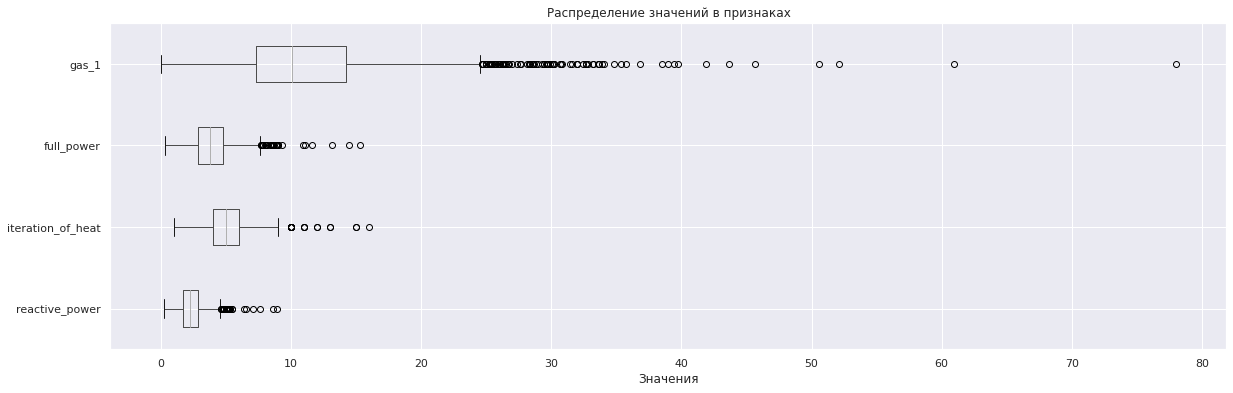

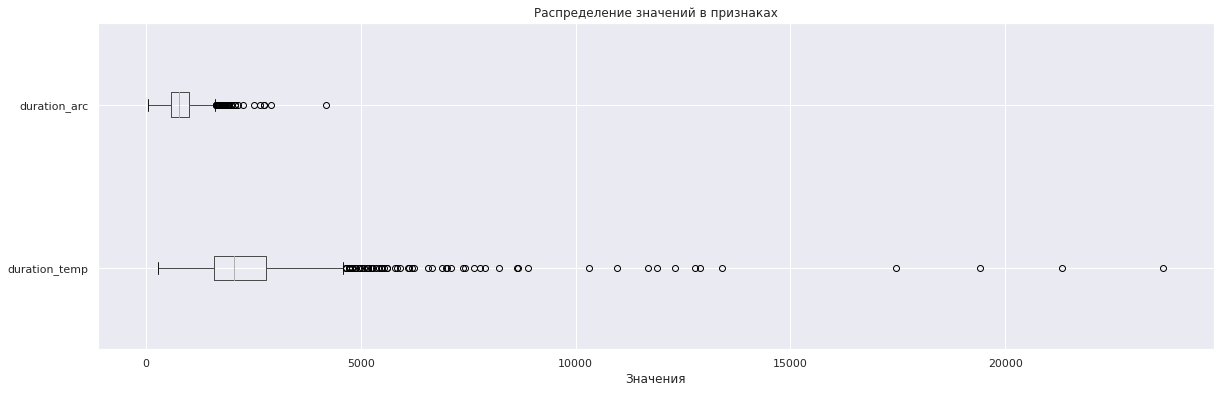

In [44]:
df_to_plot_last = final_df[['duration_temp', 'duration_arc']]
df_to_plot_first = final_df.drop(['duration_temp', 'duration_arc'], axis=1)
j=4

for i in range(0, len(df_to_plot_first.columns), 4):
    df_to_plot_first.iloc[:,i:j].boxplot(figsize=(20,6), grid=True, vert=False)
    plt.title('Распределение значений в признаках')
    plt.xlabel('Значения')
    plt.show()
    j += 4

df_to_plot_last.boxplot(figsize=(20,6), grid=True, vert=False)
plt.title('Распределение значений в признаках')
plt.xlabel('Значения')
plt.show()

#### Матрица корреляций

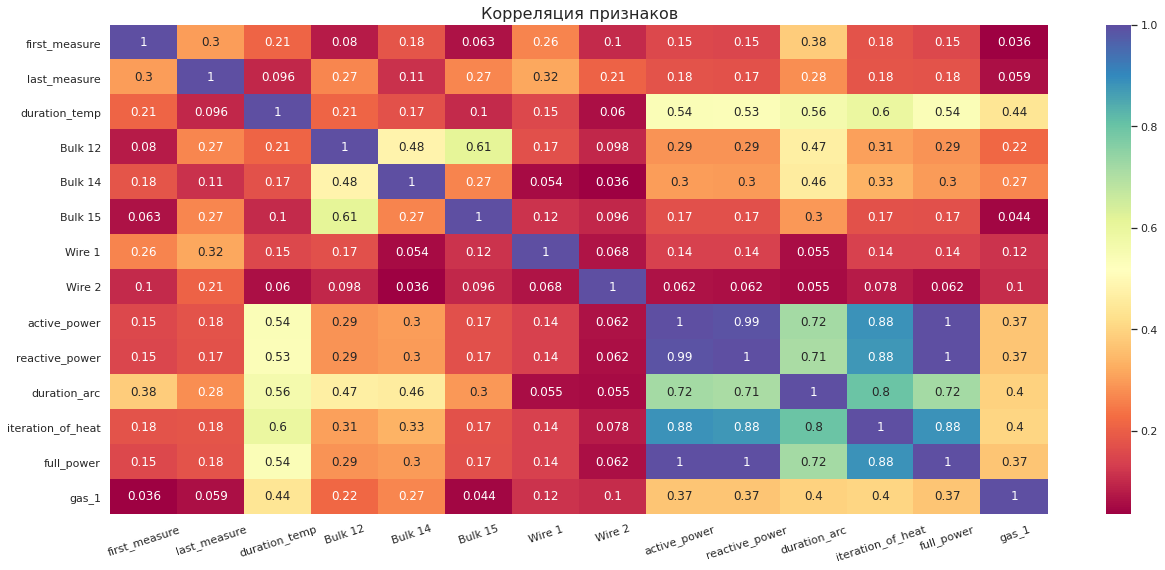

In [45]:
plt.figure(figsize=(21, 9))
fig = sns.heatmap(final_df.corr().abs(), cmap='Spectral', annot=True)
plt.title('Корреляция признаков', fontsize=16)
plt.setp(fig.get_xticklabels(), rotation=18)
plt.show()

Из матрицы корреляций увидим, что сильные корреляции наблюдаются между новыми признаками с признаками, которые были. Это не удивительно. Так же интересно отметить сильную кореляцию между столбцом с количеством итераций и столбцами с активной, реактивной мощностью и длительностью воздействия дуги. Остальные признаки достаточно слабо коррелируют между друг другом. Например, столбец `Wire 2` не имеет корреляций ни с одним из признаков.

Удалим из итогового датафреймы один из столбцов в парах, где кореляция близка к единице. Удалим столбцы: `full_power`, `iteration_of_heat`, `reactive_power`.

In [46]:
final_df = final_df.drop(['full_power', 'iteration_of_heat','reactive_power'], axis=1)
#удалим признаки

Еще раз посмотрим хитмэп.

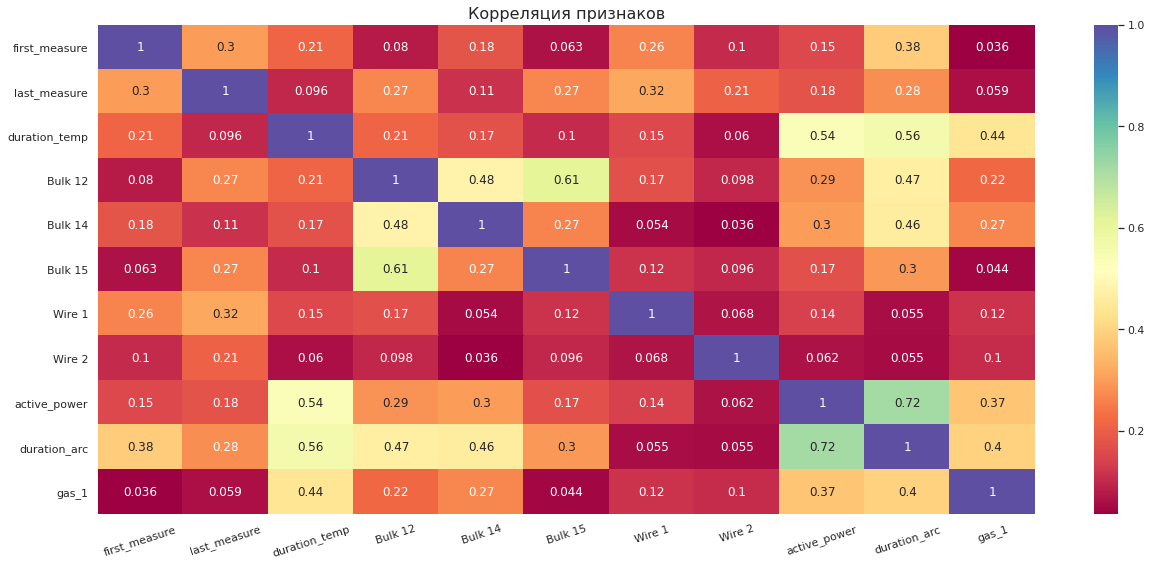

In [47]:
plt.figure(figsize=(21, 9))
fig = sns.heatmap(final_df.corr().abs(), cmap='Spectral', annot=True)
plt.title('Корреляция признаков', fontsize=16)
plt.setp(fig.get_xticklabels(), rotation=18)
plt.show()

#### Вывод

В данном разделе мы провели предобработку данных. Были заполнены пропуски, удалены малоинформативные признаки, а так же добавлены новые, которые могут повысить качество модели. В результате проделанной работы был получен датафрейм с готовыми для обучения признаками. Так же был произведен анализ по корреляции признаков. Была отмечена сильная кореляция между столбцом с количеством итераций и столбцами с активной, реактивной мощностью и длительностью воздействия дуги. Остальные признаки достаточно слабо коррелируют между друг другом. Например, столбец `Wire 2` не имеет корреляций ни с одним из признаков. Были удалены из итогового датафреймы один из столбцов в парах, где кореляция близка к единице. Были исключены столбцы: `full_power`, `iteration_of_heat`, `reactive_power`.

### Обучение моделей

#### Подготовка данных

Разобьем датафрейм на целевой и остальные признаки.

In [48]:
target = final_df['last_measure']
#выделим целевой признак

features = final_df.drop(['last_measure'], axis=1)
#удалим целевой признак из остального датафрейма. так же удалим признак key

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
#разобьем данные на тестовую и обучащие выборки

print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(1746, 10)
(583, 10)
(1746,)
(583,)


Данные разбиты в соотношении 75/25, целевой признак выделен.

#### Обучение моделей и подбор гиперпараметров

В качестве моделей для обучения были выбраны 3 типа моделей:
- LinearRegression
- LGBMRegressor
- CatBoostRegressor  
  
Для масштабирования данных был выбран StandardScaler.  
Среди гиперпараметров попробуем перебрать основные параметры модели, такие как количество эстиматоров и глубина.  
Все это заведем в пайплайн и переберем модели с выбранными гиперпараметрами методом GridSearchCV с кросс-валидацией.

In [50]:
pipe = Pipeline( [('scaler', StandardScaler()), 
                  ('regressor', LinearRegression())] )
#создадим PipeLine

param_grid = [
    {
        "regressor": [LinearRegression()]
    },
    {
        "regressor": [lgb.LGBMRegressor(random_state=RANDOM_STATE)],
        "regressor__n_estimators": range(20,100,20),
        "regressor__num_leaves": [n for n in range(20, 100, 20)],
        "regressor__boosting_type": ['gbdt', 'dart']
    },
    {
        "regressor": [CatBoostRegressor(random_state=RANDOM_STATE)],
        "regressor__depth": [3, 5, 8],
        "regressor__n_estimators": range(20,100,20)     
    }]
#зададим модели и параметры для перебора

grid = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_mean_absolute_error', verbose=2)
#передадим в GridSearchCV параметры и PipeLine

grid.fit(features, target)
#обучим grid

print(f'Лучшие параметры: {grid.best_params_}')
print(f'MAE лучшей модели: {-grid.best_score_}')
#выведем лучшие параметры и результат MAE лучшей модели

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END .......................regressor=LinearRegression(); total time=   0.0s
[CV] END .......................regressor=LinearRegression(); total time=   0.0s
[CV] END .......................regressor=LinearRegression(); total time=   0.0s
[CV] END .......................regressor=LinearRegression(); total time=   0.0s
[CV] END .......................regressor=LinearRegression(); total time=   0.0s
[CV] END regressor=LGBMRegressor(random_state=80424), regressor__boosting_type=gbdt, regressor__n_estimators=20, regressor__num_leaves=20; total time=  47.8s
[CV] END regressor=LGBMRegressor(random_state=80424), regressor__boosting_type=gbdt, regressor__n_estimators=20, regressor__num_leaves=20; total time=   2.4s
[CV] END regressor=LGBMRegressor(random_state=80424), regressor__boosting_type=gbdt, regressor__n_estimators=20, regressor__num_leaves=20; total time=   4.2s
[CV] END regressor=LGBMRegressor(random_state=80424), regre

Модели обучены. Лучшая модель была определена как CatBoostRegressor с параметрами: depth = 3, n_estimators = 80. Значение MAE на обучающих данных составило: 6.09

### Проверка модели на тестовых данных

In [51]:
predictions = grid.best_estimator_.predict(features_test)

print(f'MAE (test): {mean_absolute_error(target_test, predictions):.2f}')
print(f'R2 (test): {r2_score(target_test, predictions):.2f}')

MAE (test): 4.77
R2 (test): 0.69


Метрика на тестовых данных улучшилась по сравнению с обучающими данными и составила MAE = 4.77. Рассчитанная коэффициент детерминации составил 0.69, что говорит об удовлетворительном качестве модели.

Построим график важности признаков.

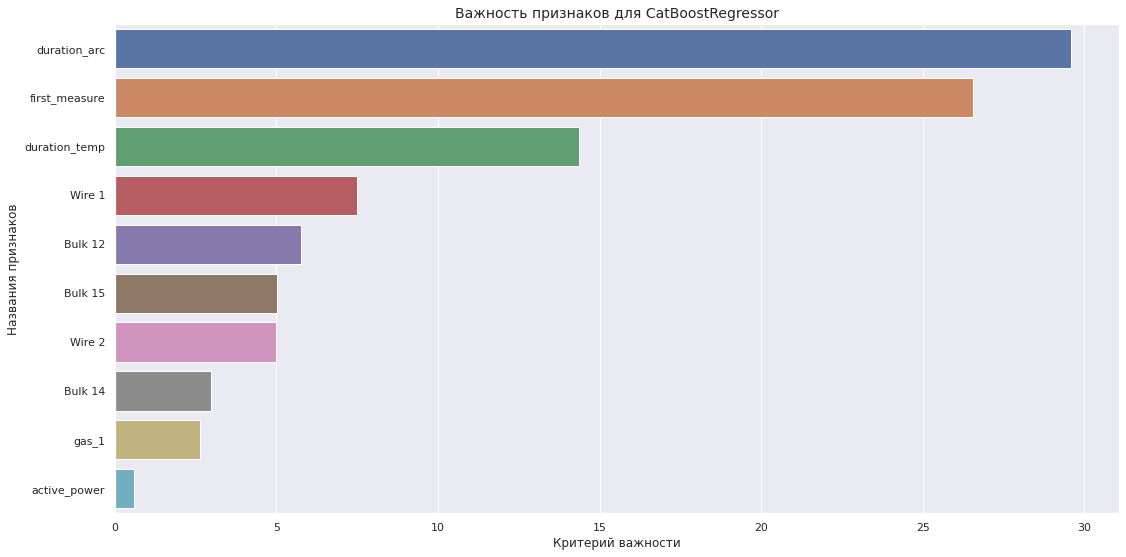

In [52]:
plot_data = {
    'features': features_test.columns,
    'feature_importances': grid.best_estimator_.steps[1][1].feature_importances_,
}
plot_data = pd.DataFrame(plot_data)
plot_data.sort_values(by='feature_importances', ascending=False, inplace=True)
plt.figure(figsize=(18, 9))
sns.barplot(x=plot_data['feature_importances'], y=plot_data['features'])
plt.title('Важность признаков для CatBoostRegressor', fontsize=14)
plt.xlabel('Критерий важности')
plt.ylabel('Названия признаков')
plt.show()

Для модели самым важным признаками оказались первое измерение температуры и длительность работы дуги.

Проверим MAE у дамми модели с помощью DammyRegressor.

In [53]:
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(features_train, target_train)
dummy_regr_pred = dummy_regr.predict(features_test)

print(f'MAE dummy-модели: {mean_absolute_error(target_test, dummy_regr_pred)}')

MAE dummy-модели: 7.840480327606201


MAE DammyRegressor составило 7.84, что значительно хуже чем у итоговой модели. Это говорит нам о том, что модель хорошо предсказывает целевой параметр.

## Вывод

Целью данного проекта ставилась разработка модели для предсказания температуры при обработки стали.  
В качестве исходных данных от Заказчика были получены таблицы с различными замерами по этапам обработки, а так же некоторые указания по особенностям технологического процесса. 
  
В рамках изучения исходных данных были изучены все датафреймы. Из датафреймов стало понятно, что в них практически нет пропусков и дубликатов, только пропуски связанные с самим устройством датафреймов и видов материалов. Основные информативные столбца в датафрейме ```data_bulk_new``` это `Bulk 14`, `Bulk 15` и `Bulk 12`, остальные были исключены. Так же видно, что в датафрейме ```data_wire_new``` информацию несут только столбцы `Wire 1` и `Wire 2`, остальные были исключены из-за слишком малого объема содержашейся информации. Данные, содержащиеся в датафреймах так же имеют выбросы по всей видимости связанные с технологией самого процесса. В датафрейме ```data_gas_new``` имеются данные об отрицательной реактивной мощности, вероятность такого слишком мала и поэтому эти данные были исключены из датафрейма. В датафрейме ```data_temp_new``` видно, что некоторые температуры ниже 1500 градусов. Учитывая все вышеуказанное, потребовалось провести предобработку данных.  
  
В рамках предобработки данных были заполнены пропуски, удалены малоинформативные признаки, а так же добавлены новые. В результате проделанной работы был получен датафрейм с готовыми для обучения признаками. Так же был произведен анализ по корреляции признаков. Была отмечена сильная кореляция между столбцом с количеством итераций и столбцами с активной, реактивной мощностью и длительностью воздействия дуги. Остальные признаки достаточно слабо коррелируют между друг другом. Например, столбец `Wire 2` не имеет корреляций ни с одним из признаков.  
  
В качестве моделей для обучения были выбраны 3 типа моделей:  
  
- LinearRegression
- LGBMRegressor
- CatBoostRegressor  
  
Для масштабирования данных был выбран StandardScaler.  
Среди гиперпараметров были перебраны основные параметры модели, такие как количество эстиматоров и глубина.  
Все это было заведено в пайплайн и перебрано методом GridSearchCV с кросс-валидацией.  
  
Лучшая модель была определена как CatBoostRegressor с параметрами:   
- depth = 3  
- n_estimators = 80
- random_state = 80424
  
Значение MAE на обучающих данных составило: 6.09  
  
После проверки лучшей модели на тестовых данных метрика MAE улучшилась по сравнению с обучающими данными и составила 4.77. Рассчитанный коэффициент детерминации составил 0.69.  
  
В части корреляции признаков было определено, что самым важными признаками оказались первое измерение температуры и длительность работы дуги.
  
Была так же построена модель DummyRegressor для подтверждения работоспособности лучшей модели. MAE DammyRegressor составило 7.84, что значительно хуже чем у итоговой модели.  
  
В результате проекта, была получна модель с высокими качествами работы. Рекомендую использовать данную модель для выполнения поставленной задачи.